# Handwriting Recognition of Medical Notes Using Deep Learning

## By Krish Devnani, Francis Tang, Xavier Hernandez, and Ibrahim Khan

#### Installing EMNIST, only run 1 time

In [ ]:
!pip uninstall emnist


In [ ]:
!pip install emnist


## Loading Data

In [1]:
# importing necessary packages

import numpy as np
import gzip
from google.colab import drive
import os

# Mount Google Drive (in order to not have to upload files every time)
drive.mount('/content/drive')

# functions to load the images and labels
def load_emnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, 28, 28)
    return data

def load_emnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

# Google Drive folder path
folder_path = '/content/drive/My Drive/A Final Project/Data'

# Load training images and labels
x_train = load_emnist_images(os.path.join(folder_path, 'emnist-letters-train-images-idx3-ubyte.gz'))
y_train = load_emnist_labels(os.path.join(folder_path, 'emnist-letters-train-labels-idx1-ubyte.gz'))

# Load test images and labels
x_test = load_emnist_images(os.path.join(folder_path, 'emnist-letters-test-images-idx3-ubyte.gz'))
y_test = load_emnist_labels(os.path.join(folder_path, 'emnist-letters-test-labels-idx1-ubyte.gz'))

# Load mapping
with open(os.path.join(folder_path, 'emnist-letters-mapping.txt'), 'r') as f:
    mapping = f.readlines()
mapping = [line.split() for line in mapping]
mapping = {int(line[0]): chr(int(line[1])) for line in mapping}

# Convert labels to characters
y_train = np.array([mapping[label] for label in y_train])
y_test = np.array([mapping[label] for label in y_test])

Mounted at /content/drive


### Testing if data loading was successful

First 25 labels from the training set:
W G P O W Q M K V X J N R U Z U U X S E B Y I E J 

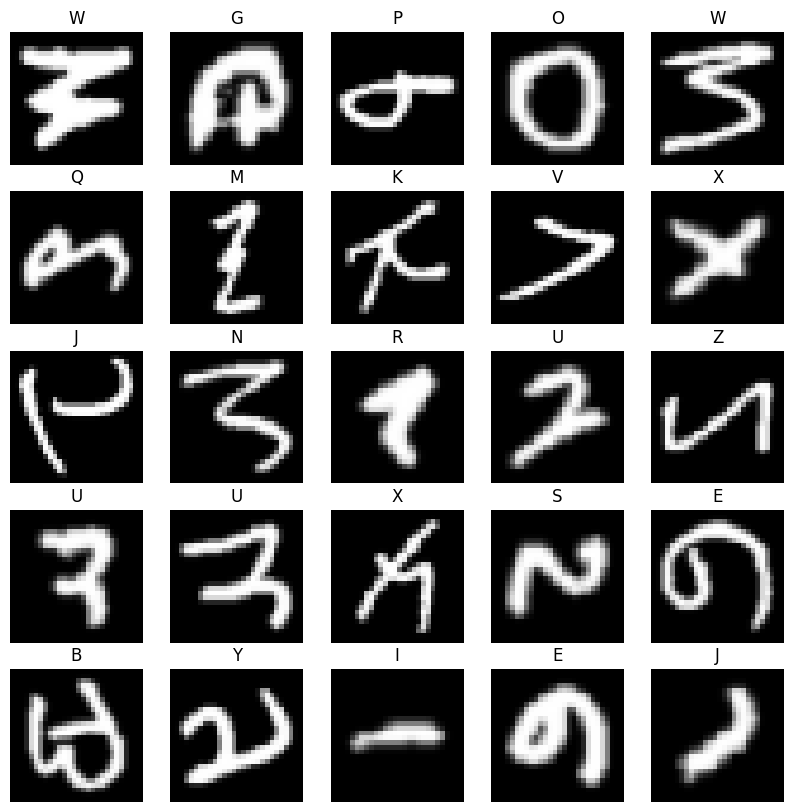

In [2]:
# import necessary packages
import matplotlib.pyplot as plt

# Function to plot images
def plot_images(images, labels, nrows, ncols):
    fig, axes = plt.subplots(nrows, ncols, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        ax.set_title(labels[i])
        ax.axis('off')

# Plot first 25 images from the training set
plot_images(x_train, y_train, 5, 5)

# Print first 25 labels from the training set
print("First 25 labels from the training set:")
for label in y_train[:25]:
    print(label, end=' ')


## Data Preprocessing

In [3]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# import necessary packages
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_onehot = encoder.transform(y_test.reshape(-1, 1))

# Verify the shape and unique classes
print(f"Shape of y_train_onehot: {y_train_onehot.shape}")
print(f"Unique classes in y_train: {np.unique(y_train)}")

Shape of y_train_onehot: (124800, 26)
Unique classes in y_train: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Model 1: Initial Model

### Model definition and compilation

In [8]:
# Model definition and compilation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.utils import set_random_seed
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

# This is needed for replicability
set_random_seed(555)
total_num_classes = 26  # For the 26 alphabet letters

model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1,), activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(32, kernel_size=(2, 2), activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(total_num_classes, activation='softmax'))

# Configure optimizer and loss
optim = Adam(learning_rate=0.001)
loss_fn = CategoricalCrossentropy()

model1.compile(loss=loss_fn, optimizer=optim, metrics=["accuracy"])

batch_size = 128
epochs = 15

model1.fit(x_train, y_train_onehot, batch_size=batch_size, epochs=epochs)


Epoch 1/15
975/975 [==============================] - 5s 4ms/step - loss: 1.2454 - accuracy: 0.7794
Epoch 2/15
975/975 [==============================] - 3s 3ms/step - loss: 0.3777 - accuracy: 0.8819
Epoch 3/15
975/975 [==============================] - 3s 3ms/step - loss: 0.3235 - accuracy: 0.8973
Epoch 4/15
975/975 [==============================] - 4s 4ms/step - loss: 0.2913 - accuracy: 0.9062
Epoch 5/15
975/975 [==============================] - 4s 4ms/step - loss: 0.2705 - accuracy: 0.9115
Epoch 6/15
975/975 [==============================] - 3s 3ms/step - loss: 0.2538 - accuracy: 0.9175
Epoch 7/15
975/975 [==============================] - 3s 3ms/step - loss: 0.2427 - accuracy: 0.9200
Epoch 8/15
975/975 [==============================] - 4s 4ms/step - loss: 0.2303 - accuracy: 0.9237
Epoch 9/15
975/975 [==============================] - 4s 4ms/step - loss: 0.2226 - accuracy: 0.9252
Epoch 10/15
975/975 [==============================] - 3s 3ms/step - loss: 0.2134 - accuracy: 0.9272

### Checking Accuracy and Metrics

In [9]:
from sklearn.metrics import accuracy_score

# Create a mapping dictionary
mapping = {i: chr(i + 65) for i in range(26)}

predictions1 = model1.predict(x_test)
predicted_class_indices1 = predictions1.argmax(axis=1)
true_class_indices = np.argmax(y_test_onehot, axis=1)

# Get the class labels for predictions and true labels
predicted_class_labels1 = [mapping[i] for i in predicted_class_indices1]
true_class_labels = [mapping[i] for i in true_class_indices]

# Compute accuracy
acc1 = accuracy_score(true_class_labels, predicted_class_labels1)

print(f"Testing accuracy: Model 1 = {acc1}")


650/650 [==============================] - 1s 2ms/step
Testing accuracy: Model 1 = 0.9117788461538462


In [10]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 32)        4128      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1152)              0         
                                                                 
 dense_5 (Dense)             (None, 26)               

In [11]:
from sklearn.metrics import classification_report

report1 = classification_report(true_class_labels, predicted_class_labels1)
print("Classification Report: Model 1\n", report1)

Classification Report: Model 1
               precision    recall  f1-score   support

           A       0.88      0.87      0.87       800
           B       0.95      0.94      0.94       800
           C       0.95      0.94      0.95       800
           D       0.94      0.90      0.92       800
           E       0.90      0.96      0.93       800
           F       0.98      0.90      0.94       800
           G       0.87      0.72      0.79       800
           H       0.93      0.91      0.92       800
           I       0.71      0.76      0.73       800
           J       0.94      0.93      0.94       800
           K       0.93      0.95      0.94       800
           L       0.75      0.72      0.74       800
           M       0.97      0.98      0.97       800
           N       0.92      0.93      0.93       800
           O       0.93      0.97      0.95       800
           P       0.97      0.97      0.97       800
           Q       0.80      0.85      0.82      

## Model 2: Changing Activation Function

### Model definition and compilation

In [13]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1,), activation="sigmoid"))  # Changed activation function to sigmoid
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(32, kernel_size=(2, 2), activation="sigmoid"))  # Changed activation function to sigmoid
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(total_num_classes, activation='softmax'))

from tensorflow.keras.optimizers import legacy

optim = legacy.Adam(learning_rate=0.001)

model2.compile(loss=loss_fn, optimizer=optim, metrics=["accuracy"])

batch_size = 128
epochs = 15

model2.fit(x_train, y_train_onehot, batch_size=batch_size, epochs=epochs)

Epoch 1/15
975/975 [==============================] - 4s 3ms/step - loss: 1.1703 - accuracy: 0.6679
Epoch 2/15
975/975 [==============================] - 3s 3ms/step - loss: 0.5111 - accuracy: 0.8480
Epoch 3/15
975/975 [==============================] - 3s 3ms/step - loss: 0.4013 - accuracy: 0.8774
Epoch 4/15
975/975 [==============================] - 4s 4ms/step - loss: 0.3553 - accuracy: 0.8895
Epoch 5/15
975/975 [==============================] - 3s 3ms/step - loss: 0.3260 - accuracy: 0.8987
Epoch 6/15
975/975 [==============================] - 3s 3ms/step - loss: 0.3057 - accuracy: 0.9043
Epoch 7/15
975/975 [==============================] - 3s 3ms/step - loss: 0.2905 - accuracy: 0.9087
Epoch 8/15
975/975 [==============================] - 4s 4ms/step - loss: 0.2780 - accuracy: 0.9122
Epoch 9/15
975/975 [==============================] - 3s 3ms/step - loss: 0.2666 - accuracy: 0.9158
Epoch 10/15
975/975 [==============================] - 3s 3ms/step - loss: 0.2583 - accuracy: 0.9170

In [14]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 32)        4128      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 6, 6, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 1152)              0         
                                                                 
 dense_8 (Dense)             (None, 26)               

### Checking Accuracy and Metrics

In [15]:
from sklearn.metrics import accuracy_score

# Create a mapping dictionary
mapping = {i: chr(i + 65) for i in range(26)}

predictions2 = model2.predict(x_test)
predicted_class_indices2 = predictions2.argmax(axis=1)
true_class_indices = np.argmax(y_test_onehot, axis=1)

# Get the class labels for predictions and true labels
predicted_class_labels2 = [mapping[i] for i in predicted_class_indices2]
true_class_labels = [mapping[i] for i in true_class_indices]

# Compute accuracy
acc2 = accuracy_score(true_class_labels, predicted_class_labels2)

print(f"Testing accuracy: Model 2 = {acc2}")

650/650 [==============================] - 1s 2ms/step
Testing accuracy: Model 2 = 0.9147596153846154


In [16]:
report2 = classification_report(true_class_labels, predicted_class_labels2)
print("Classification Report: Model 2\n", report2)

Classification Report: Model 2
               precision    recall  f1-score   support

           A       0.82      0.93      0.87       800
           B       0.91      0.96      0.94       800
           C       0.94      0.97      0.95       800
           D       0.94      0.90      0.92       800
           E       0.96      0.92      0.94       800
           F       0.96      0.94      0.95       800
           G       0.88      0.70      0.78       800
           H       0.94      0.91      0.92       800
           I       0.71      0.79      0.74       800
           J       0.90      0.93      0.92       800
           K       0.95      0.94      0.94       800
           L       0.76      0.72      0.74       800
           M       0.97      0.97      0.97       800
           N       0.93      0.94      0.94       800
           O       0.95      0.96      0.95       800
           P       0.97      0.97      0.97       800
           Q       0.79      0.84      0.81      

## Model 3: More Layers

### Model definition and compilation

In [17]:
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="sigmoid"))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(64, kernel_size=(2, 2), activation="sigmoid"))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(128, kernel_size=(2, 2), activation="sigmoid"))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dense(128, activation="sigmoid"))
model3.add(Dense(total_num_classes, activation="softmax"))

model3.compile(loss=loss_fn, optimizer=optim, metrics=["accuracy"])

batch_size = 128
epochs = 15

model3.fit(x_train, y_train_onehot, batch_size=batch_size, epochs=epochs)


Epoch 1/15
975/975 [==============================] - 6s 5ms/step - loss: 1.2822 - accuracy: 0.6216
Epoch 2/15
975/975 [==============================] - 4s 4ms/step - loss: 0.4677 - accuracy: 0.8559
Epoch 3/15
975/975 [==============================] - 4s 4ms/step - loss: 0.3590 - accuracy: 0.8881
Epoch 4/15
975/975 [==============================] - 5s 5ms/step - loss: 0.3074 - accuracy: 0.9026
Epoch 5/15
975/975 [==============================] - 4s 4ms/step - loss: 0.2753 - accuracy: 0.9119
Epoch 6/15
975/975 [==============================] - 4s 4ms/step - loss: 0.2521 - accuracy: 0.9178
Epoch 7/15
975/975 [==============================] - 5s 5ms/step - loss: 0.2356 - accuracy: 0.9226
Epoch 8/15
975/975 [==============================] - 4s 4ms/step - loss: 0.2218 - accuracy: 0.9263
Epoch 9/15
975/975 [==============================] - 4s 4ms/step - loss: 0.2098 - accuracy: 0.9302
Epoch 10/15
975/975 [==============================] - 4s 5ms/step - loss: 0.2002 - accuracy: 0.9329

In [18]:
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 12, 12, 64)        8256      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 5, 5, 128)         32896     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 2, 2, 128)        

### Checking Accuracy and Metrics

In [19]:
from sklearn.metrics import accuracy_score

# Create a mapping dictionary
mapping = {i: chr(i + 65) for i in range(26)}

predictions3 = model3.predict(x_test)
predicted_class_indices3 = predictions3.argmax(axis=1)
true_class_indices = np.argmax(y_test_onehot, axis=1)

# Get the class labels for predictions and true labels
predicted_class_labels3 = [mapping[i] for i in predicted_class_indices3]
true_class_labels = [mapping[i] for i in true_class_indices]

# Compute accuracy
acc3 = accuracy_score(true_class_labels, predicted_class_labels3)

print(f"Testing accuracy: Model 3 = {acc3}")

650/650 [==============================] - 1s 2ms/step
Testing accuracy: Model 3 = 0.9300480769230769


In [20]:
report3 = classification_report(true_class_labels, predicted_class_labels3)
print("Classification Report: Model 3\n", report3)

Classification Report: Model 3
               precision    recall  f1-score   support

           A       0.92      0.93      0.93       800
           B       0.96      0.93      0.95       800
           C       0.96      0.96      0.96       800
           D       0.96      0.93      0.94       800
           E       0.94      0.98      0.96       800
           F       0.97      0.96      0.96       800
           G       0.84      0.82      0.83       800
           H       0.95      0.92      0.93       800
           I       0.74      0.77      0.75       800
           J       0.96      0.93      0.95       800
           K       0.97      0.95      0.96       800
           L       0.74      0.77      0.76       800
           M       0.98      0.97      0.98       800
           N       0.92      0.96      0.94       800
           O       0.94      0.97      0.96       800
           P       0.98      0.97      0.97       800
           Q       0.86      0.82      0.84      

## Model 4: Increased Filters

### Model definition and compilation

In [21]:
model4 = Sequential()
model4.add(Conv2D(64, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="sigmoid"))  # Increased number of filters
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(128, kernel_size=(2, 2), activation="sigmoid"))  # Increased number of filters
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(256, kernel_size=(2, 2), activation="sigmoid"))  # Increased number of filters
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Flatten())
model4.add(Dense(128, activation="sigmoid"))
model4.add(Dense(total_num_classes, activation="softmax"))

model4.compile(loss=loss_fn, optimizer=optim, metrics=["accuracy"])

batch_size = 128
epochs = 15

model4.fit(x_train, y_train_onehot, batch_size=batch_size, epochs=epochs)

Epoch 1/15
975/975 [==============================] - 8s 7ms/step - loss: 1.4021 - accuracy: 0.5927
Epoch 2/15
975/975 [==============================] - 7s 7ms/step - loss: 0.3643 - accuracy: 0.8894
Epoch 3/15
975/975 [==============================] - 7s 7ms/step - loss: 0.2754 - accuracy: 0.9133
Epoch 4/15
975/975 [==============================] - 7s 7ms/step - loss: 0.2388 - accuracy: 0.9231
Epoch 5/15
975/975 [==============================] - 7s 7ms/step - loss: 0.2157 - accuracy: 0.9293
Epoch 6/15
975/975 [==============================] - 7s 7ms/step - loss: 0.1990 - accuracy: 0.9347
Epoch 7/15
975/975 [==============================] - 7s 7ms/step - loss: 0.1857 - accuracy: 0.9380
Epoch 8/15
975/975 [==============================] - 6s 7ms/step - loss: 0.1762 - accuracy: 0.9405
Epoch 9/15
975/975 [==============================] - 7s 7ms/step - loss: 0.1666 - accuracy: 0.9438
Epoch 10/15
975/975 [==============================] - 7s 7ms/step - loss: 0.1598 - accuracy: 0.9459

In [22]:
model4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 12, 12, 128)       32896     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 6, 6, 128)         0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 5, 5, 256)         131328    
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 2, 2, 256)        

### Checking Accuracy and Metrics

In [23]:
# Create a mapping dictionary
mapping = {i: chr(i + 65) for i in range(26)}

predictions4 = model4.predict(x_test)
predicted_class_indices4 = predictions4.argmax(axis=1)
true_class_indices = np.argmax(y_test_onehot, axis=1)

# Get the class labels for predictions and true labels
predicted_class_labels4 = [mapping[i] for i in predicted_class_indices4]
true_class_labels = [mapping[i] for i in true_class_indices]

# Compute accuracy
acc4 = accuracy_score(true_class_labels, predicted_class_labels4)

print(f"Testing accuracy: Model 4 = {acc4}")

650/650 [==============================] - 1s 2ms/step
Testing accuracy: Model 4 = 0.9356730769230769


In [24]:
report4 = classification_report(true_class_labels, predicted_class_labels3)
print("Classification Report: Model 4\n", report4)

Classification Report: Model 4
               precision    recall  f1-score   support

           A       0.92      0.93      0.93       800
           B       0.96      0.93      0.95       800
           C       0.96      0.96      0.96       800
           D       0.96      0.93      0.94       800
           E       0.94      0.98      0.96       800
           F       0.97      0.96      0.96       800
           G       0.84      0.82      0.83       800
           H       0.95      0.92      0.93       800
           I       0.74      0.77      0.75       800
           J       0.96      0.93      0.95       800
           K       0.97      0.95      0.96       800
           L       0.74      0.77      0.76       800
           M       0.98      0.97      0.98       800
           N       0.92      0.96      0.94       800
           O       0.94      0.97      0.96       800
           P       0.98      0.97      0.97       800
           Q       0.86      0.82      0.84      

## Additional evaluation with visualizations

### ROC Curve

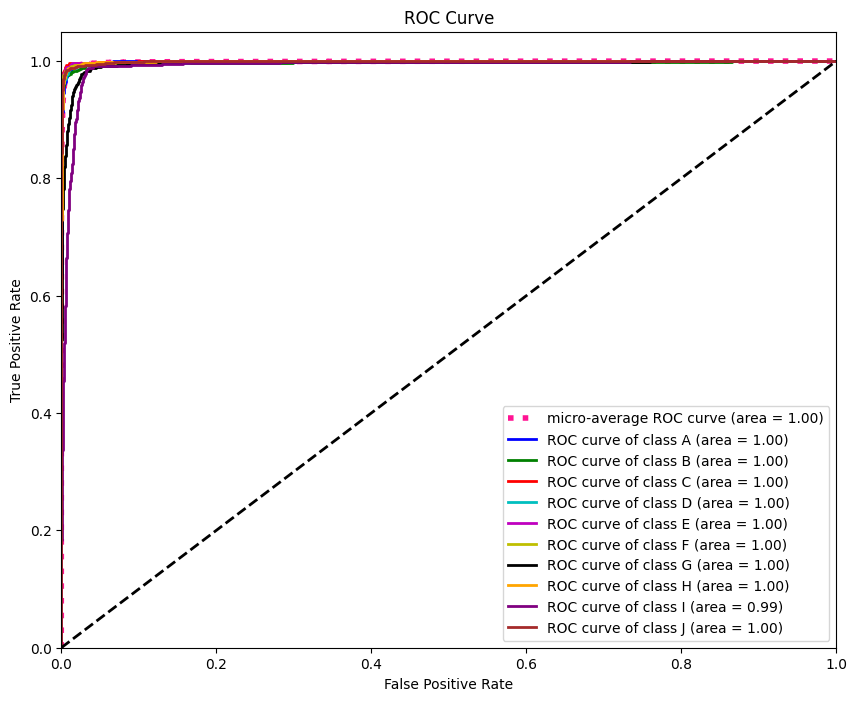

In [32]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import numpy as np

# Binarize the true labels
y_test_binarized = label_binarize(y_test, classes=list(mapping.values()))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(mapping)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], predictions4[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), predictions4.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']

for i, color in zip(range(len(mapping)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(mapping[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


### Confusion Matrix

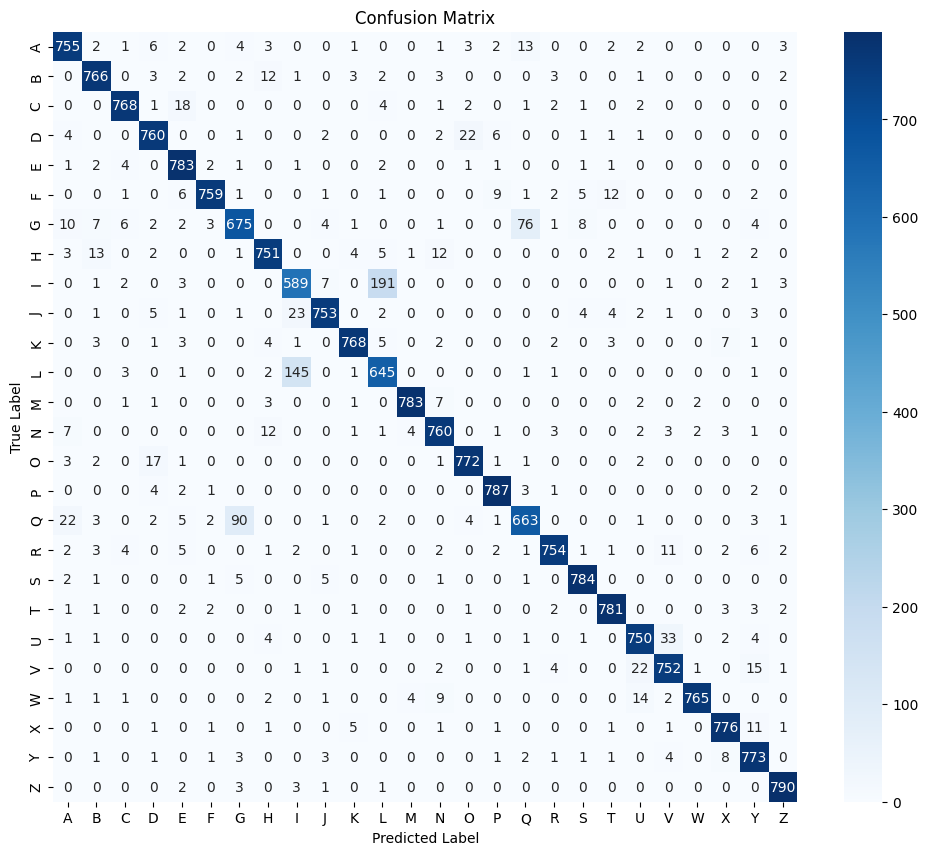

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(true_class_labels, predicted_class_labels4)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(mapping.values()),
            yticklabels=list(mapping.values()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Additional Testing/Debugging

In [27]:
print("Unique values in predicted_class_indices:", np.unique(predicted_class_indices3))
print("Unique values in true_class_indices:", np.unique(true_class_indices))


Unique values in predicted_class_indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Unique values in true_class_indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


In [28]:
missing_keys = [i for i in predicted_class_indices3 if i not in mapping.keys()]
print("Missing keys:", missing_keys)


Missing keys: []


Text(0.5, 1.0, 'Predicted = A Expected = 0')

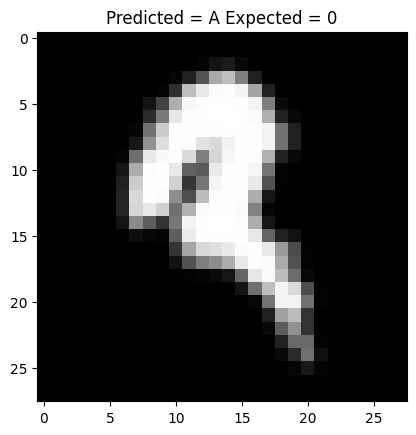

In [29]:
plt.imshow(x_test[0],cmap="gray")
plt.title(f"Predicted = {y_test[0]} Expected = {predicted_class_indices3[0]}")

Text(0.5, 1.0, 'Predicted = A Expected = 0')

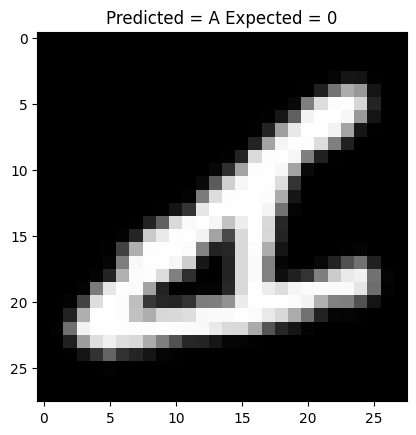

In [30]:
plt.imshow(x_test[1],cmap="gray")
plt.title(f"Predicted = {y_test[1]} Expected = {predicted_class_indices3[1]}")

Text(0.5, 1.0, 'Predicted = A Expected = 0')

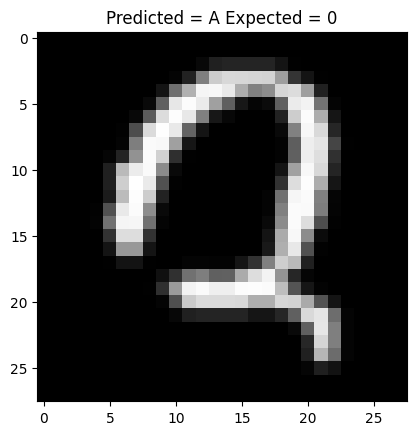

In [31]:
plt.imshow(x_test[2],cmap="gray")
plt.title(f"Predicted = {y_test[2]} Expected = {predicted_class_indices3[2]}")